<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/regression/06_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja drzew decyzyjnych
najczęsciej używany w modelach klasyfikacji

ustawia się głębokości, skłonne do przeuczenia, ale trzbe uważać z ustawianiem głębokości, przykład z głębokością 2

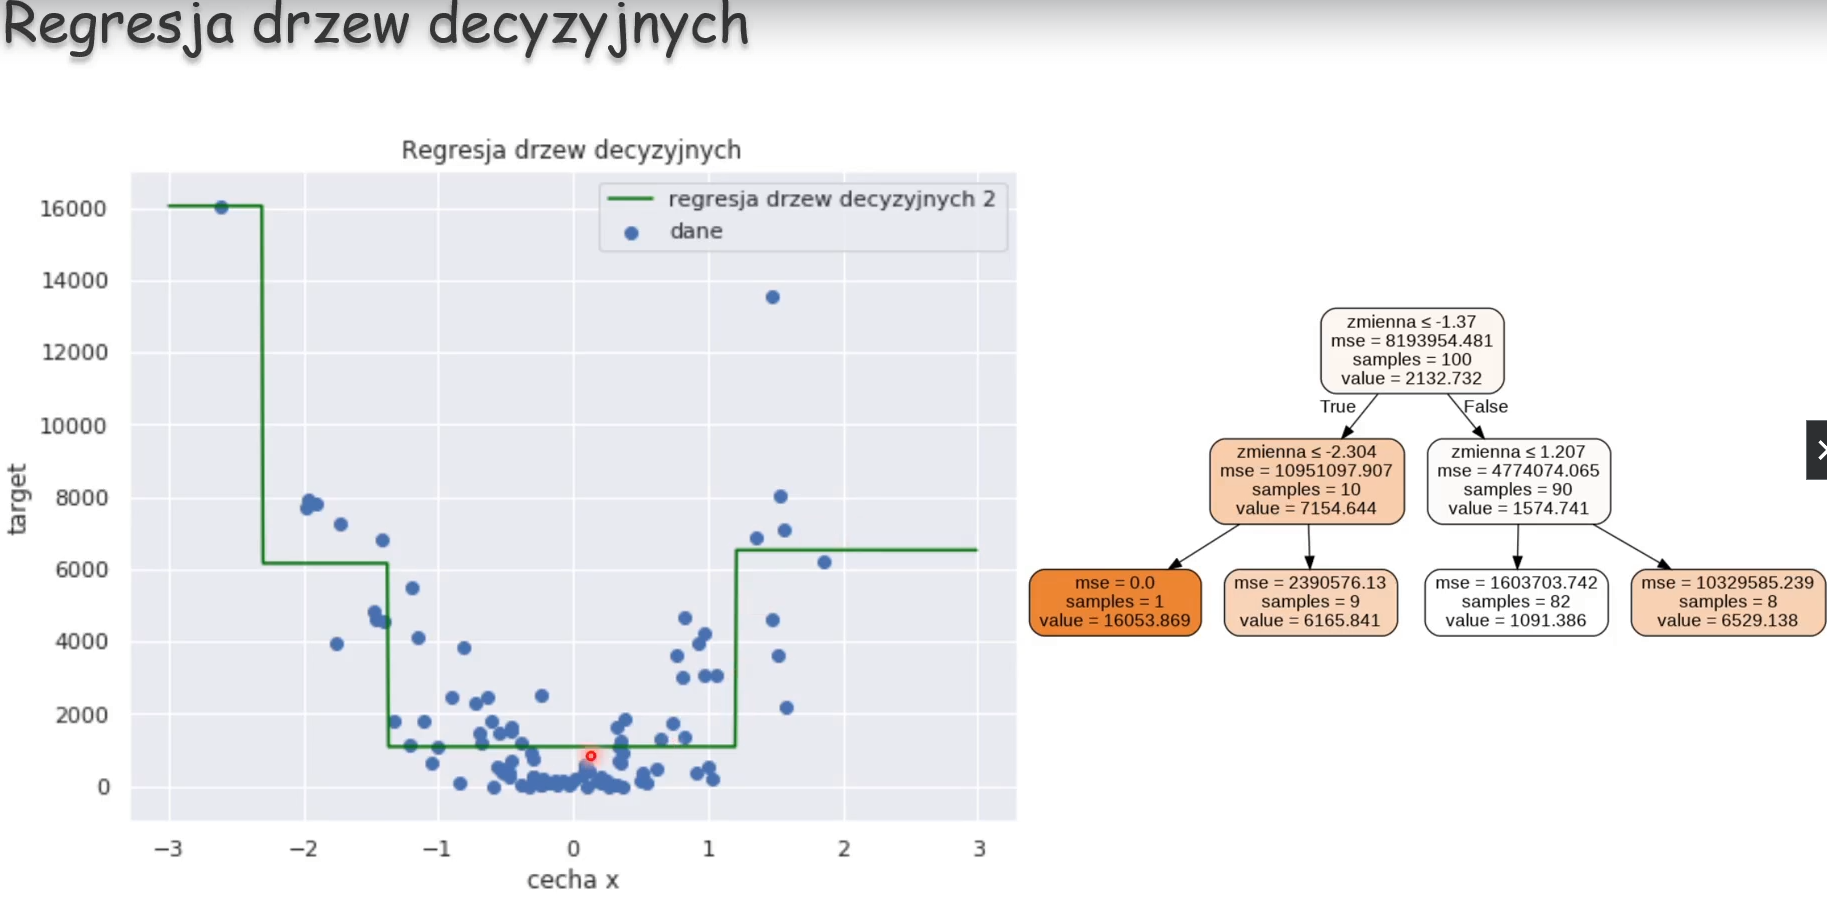

In [1]:
#import bibliotek
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress = True)
sklearn.__version__

'1.2.2'

In [2]:
#wygenerowanie danych
data, target = make_regression(n_samples=200, n_features=1, noise=20)

target = target **2
print(f'{data[:5]}\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


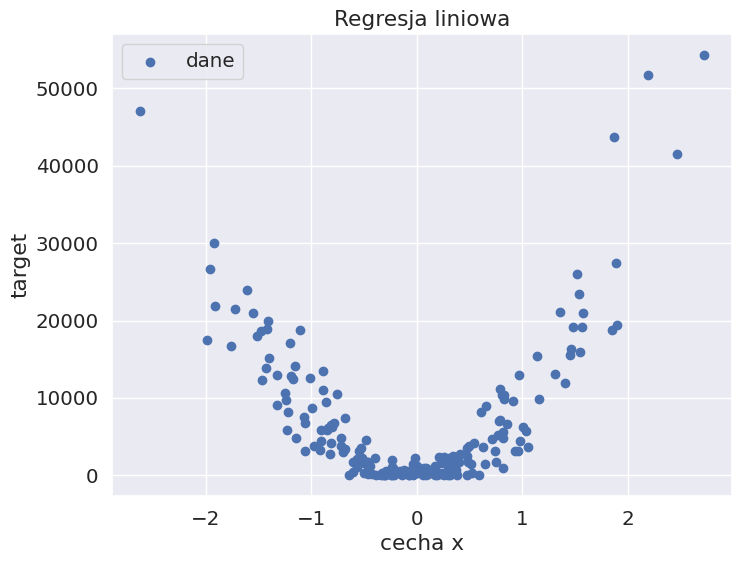

In [3]:
#wykres danych
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

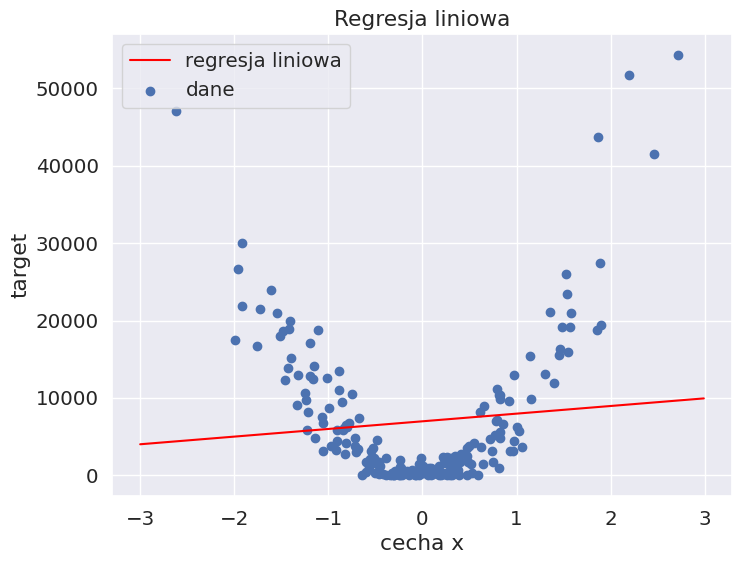

In [4]:
#regresja liniowa
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

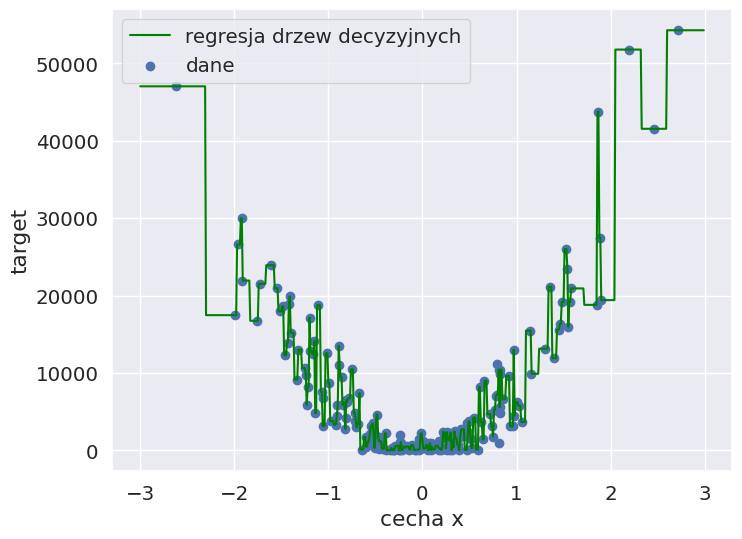

In [5]:
#regresja drzew decyzyjnych, bez podziału, bez głębokości
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data, target)
plt.figure(figsize=(8,6))
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

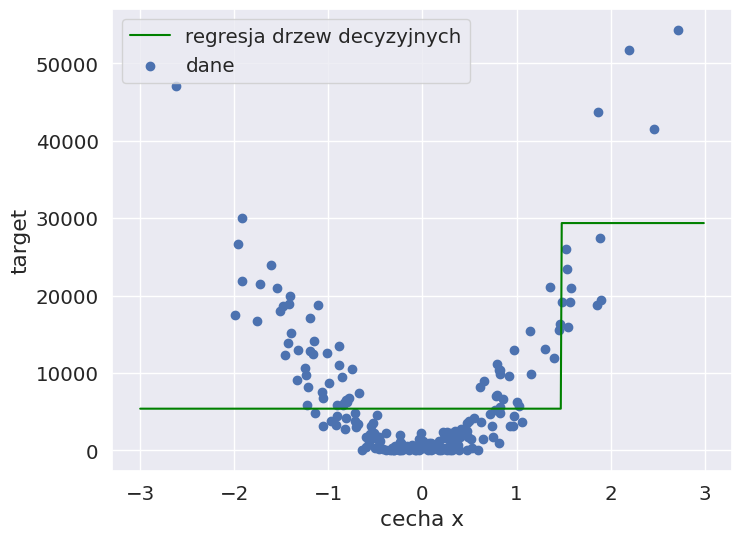

In [6]:
#głebokość na 1
max_depth = 1
regressor = DecisionTreeRegressor(max_depth = max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

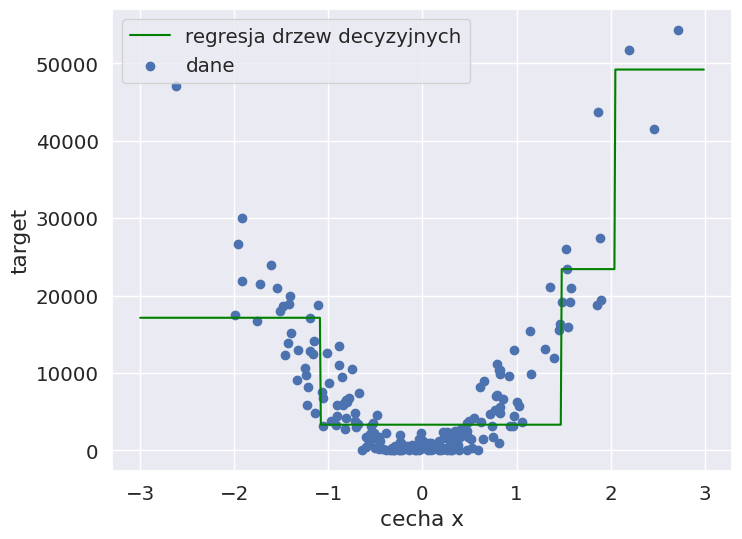

In [7]:
#głebokość na 2
max_depth = 2
regressor = DecisionTreeRegressor(max_depth = max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

# Graf drzewa decyzyjnego

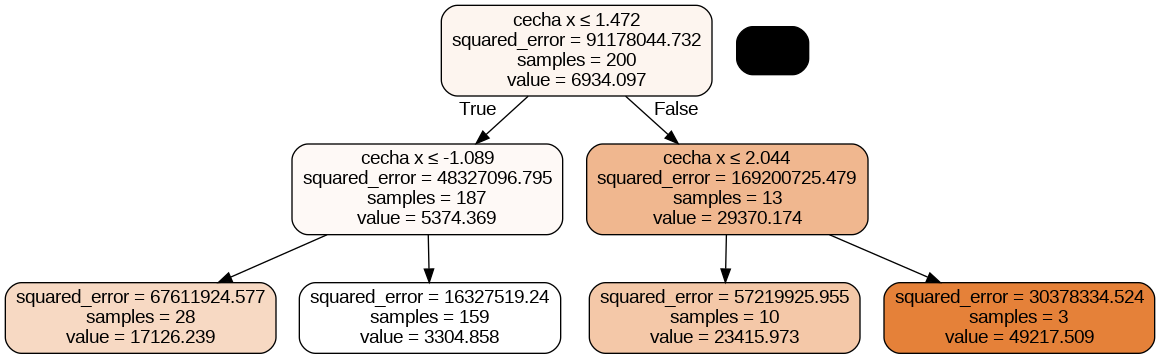

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

# Model drzewa decyzyjnego - budowa funkcji

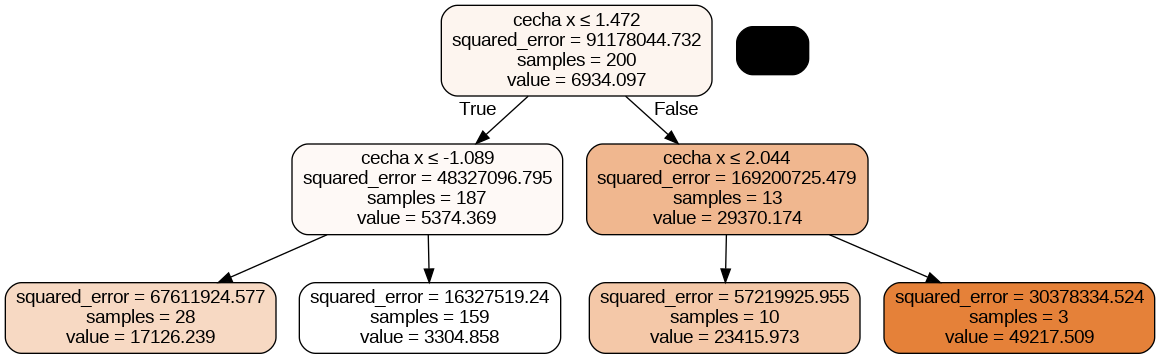

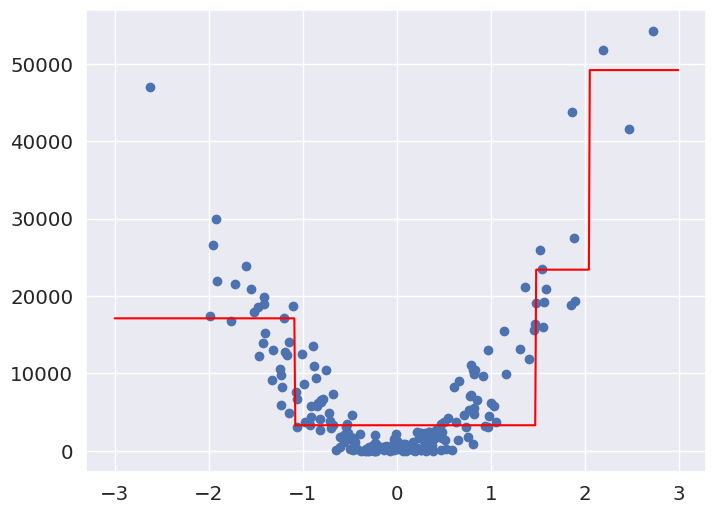

In [10]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100)

make_dt_regression(max_depth=2)

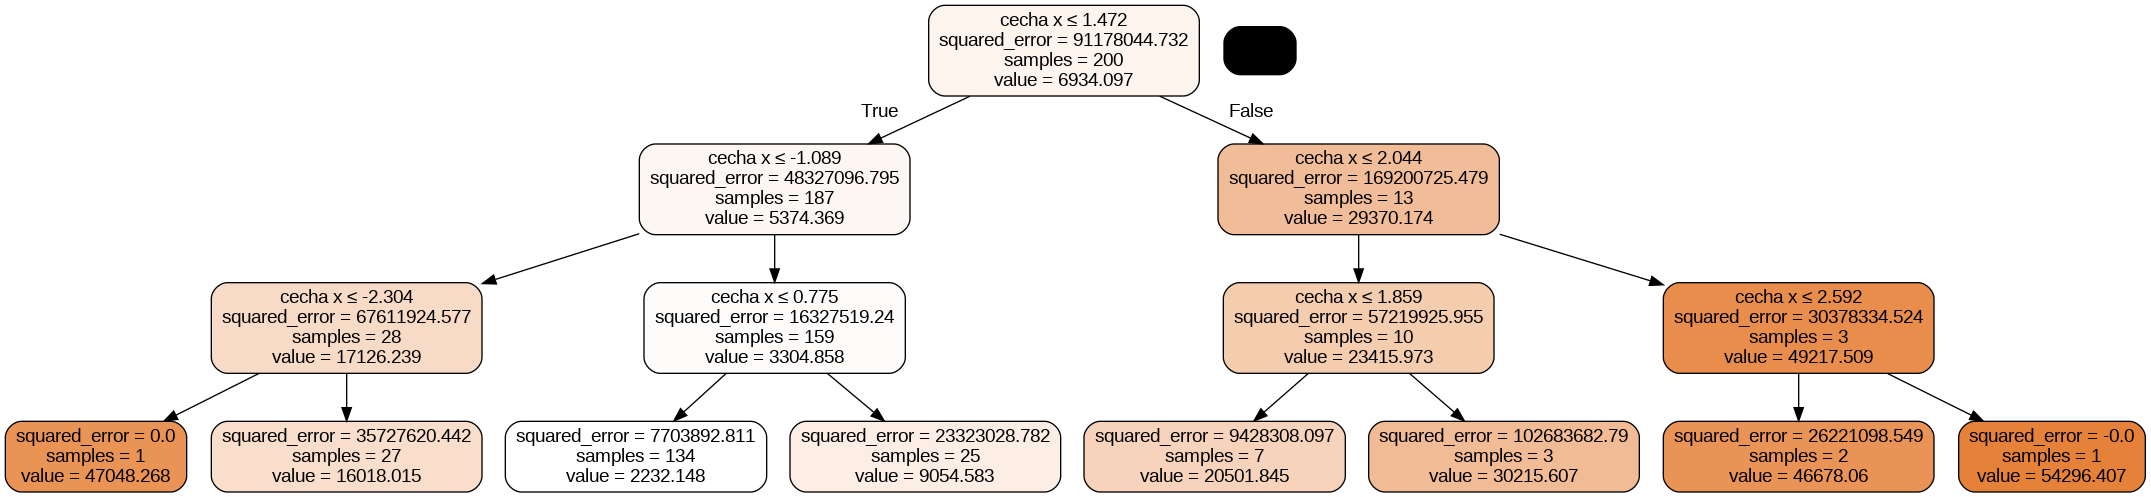

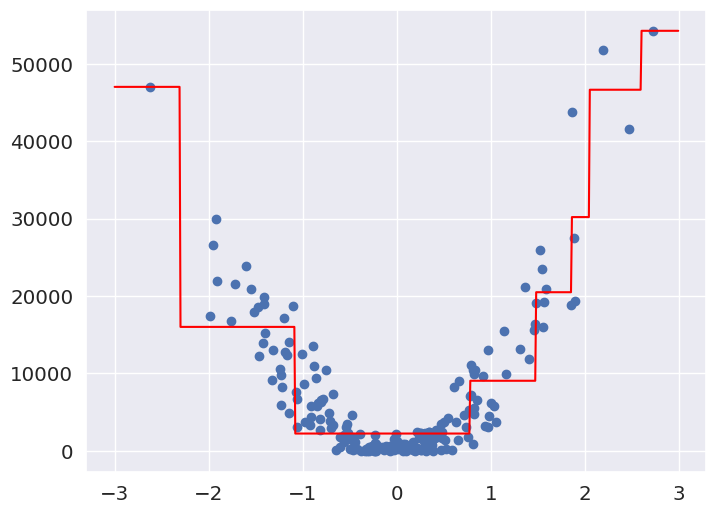

In [11]:
make_dt_regression(max_depth=3)

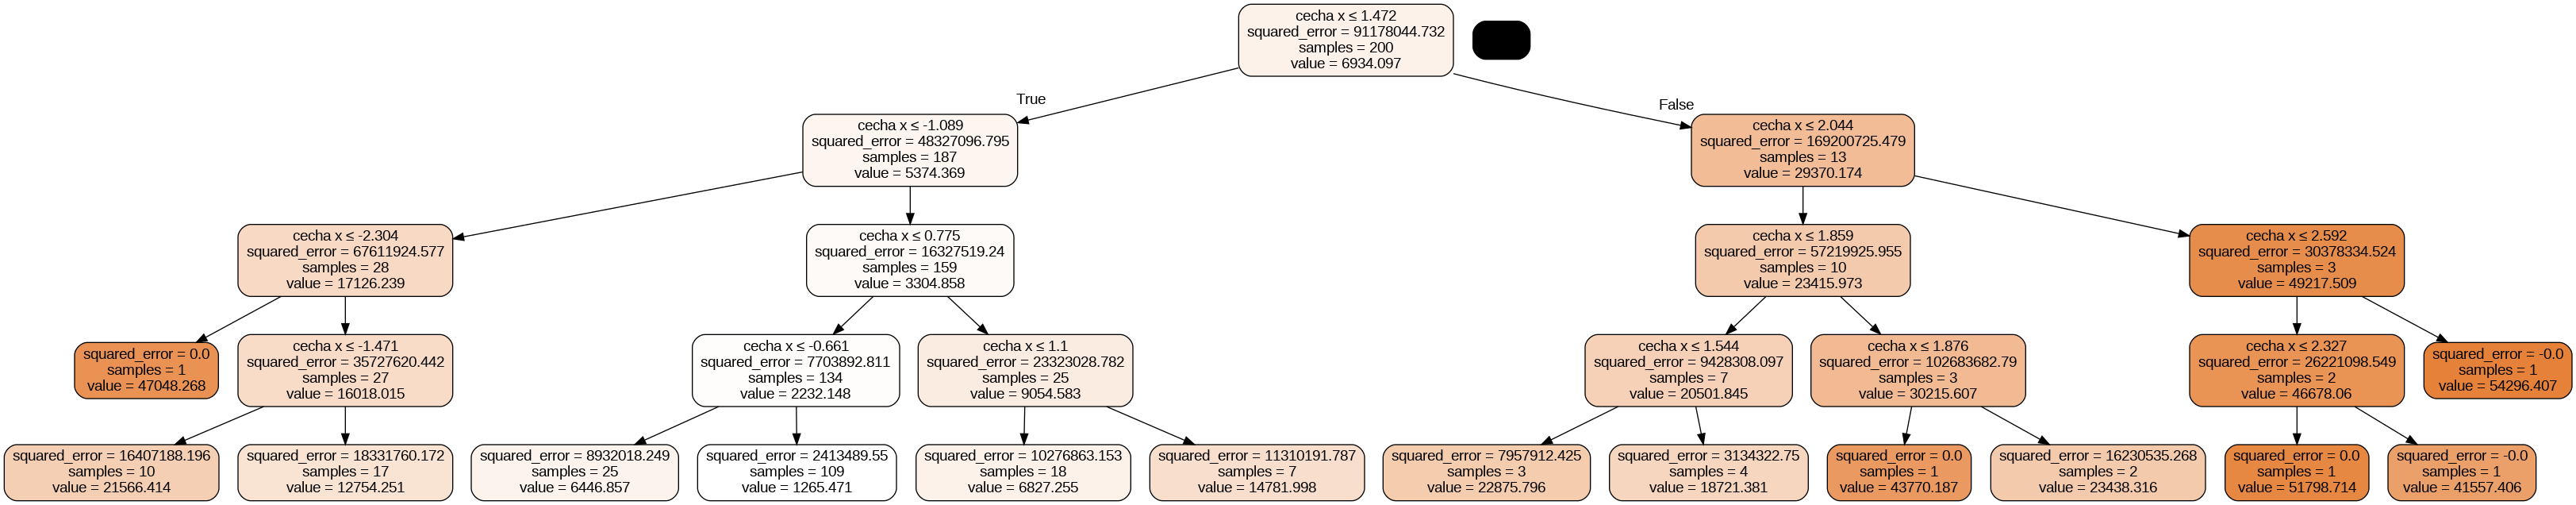

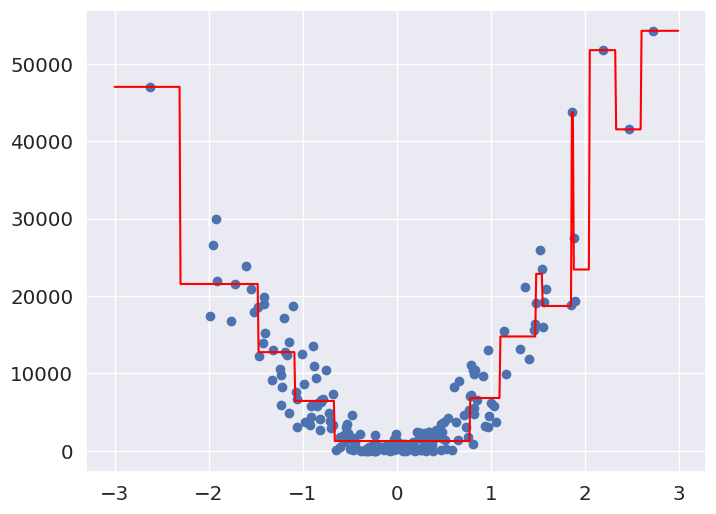

In [12]:
make_dt_regression(max_depth=4)